# Machine Learning - Exercise 4
# Generative - Discriminative Classifiers


##Import 

Import libraries that contains the implementations of the functions used in the rest of the program.



In [ ]:
import random
import numpy as np
import sklearn.metrics 
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt


print("Libraries imported.")

Libraries imported.


# Data sets

## Load data

Load training data.

Choose one of the datasets described in the next subsections.

More details on these datasets are available in https://scikit-learn.org/stable/datasets/index.html


In [ ]:
dataset_name = "Iris" # "Iris", "Wines"

if dataset_name == "Iris":
  DB = datasets.load_iris()
  class_names = np.array([str(c) for c in DB.target_names])
  X_all = DB.data
  y_all = DB.target

elif dataset_name == "Wines":
  DB = datasets.load_wine()
  class_names = np.array([str(c) for c in DB.target_names])
  X_all = DB.data
  y_all = DB.target


# print specs
print("Dataset: %s" %(dataset_name))
print("Input shape: %s" %str(X_all.shape))
print("Output shape: %s" %str(y_all.shape))
print("Number of attributes/features: %d" %(X_all.shape[1]))
print("Number of classes: %d %s" %(len(class_names), str(class_names)))
print("Number of samples: %d" %(X_all.shape[0]))

# show an example
id = random.randrange(0,X_all.shape[0])

print("Example:")
print("x%d = %r" %(id,X_all[id]))
print("y%d = %r ['%s']" %(id,y_all[id],class_names[y_all[id]]))

Dataset: Iris
Input shape: (150, 4)
Output shape: (150,)
Number of attributes/features: 4
Number of classes: 3 ['setosa' 'versicolor' 'virginica']
Number of samples: 150
Example:
x67 = array([5.8, 2.7, 4.1, 1. ])
y67 = 1 ['versicolor']


##Split data

Split the data set in training set `X_train`, `y_train` and test set `X_test`, `y_test`, using `test_size` to denote percentage of samples in the test set.

Note:
`random_state` parameter is used as random seed. Change this value to generate a different split.

IMPORTANT: solution will depend on this data split.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.333, 
                                                    random_state=117)

print("Size of training set: %d" %X_train.shape[0])
print("Size of test set: %d" %X_test.shape[0])

print('First training sample')
id = 0
print("    x_train_%d = %r" %(id,X_train[id]))
print("    y_train_%d = %r ['%s']" %(id,y_train[id],class_names[y_train[id]]))

print('First test sample')
id = 0
print("    x_test_%d = %r" %(id,X_test[id]))
print("    y_test_%d = %r ['%s']" %(id,y_test[id],class_names[y_test[id]]))


Size of training set: 100
Size of test set: 50
First training sample
    x_train_0 = array([6.7, 3.1, 4.7, 1.5])
    y_train_0 = 1 ['versicolor']
First test sample
    x_test_0 = array([6.2, 2.8, 4.8, 1.8])
    y_test_0 = 2 ['virginica']


## Reduce data set to two dimensions

Reduce feature dimensions to 2. We consider only a 2D input for visualizing the data generation capability of this model using 2D plots.

In [ ]:
# select the first two features
X_train_reduced = X_train[:,0:2]
X_test_reduced = X_test[:,0:2]
print("Input shape reduced train: %s" %str(X_train_reduced.shape))
print("Input shape reduced test: %s" %str(X_test_reduced.shape))

Input shape reduced train: (100, 2)
Input shape reduced test: (50, 2)


## Visualize data 

Visualize reduced training/test sets

Text(0.5, 1.0, 'Training and test samples')

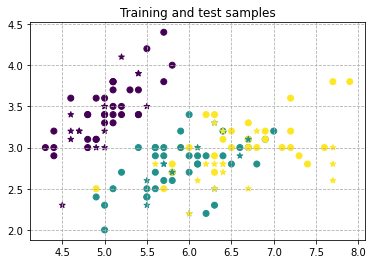

In [ ]:
plt.figure()
plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1], c=y_train)
plt.scatter(X_test_reduced[:,0], X_test_reduced[:,1], c=y_test, marker="*")
plt.grid(linestyle="--")
plt.title("Training and test samples")

# Generative model

In [ ]:
gen_model = GaussianNB()

Fit generative model on reduced training data and print generative parameters:

> Means and standard deviations of fitted Gaussians are of dimension *(num_classes x num_features)*


In [ ]:
gen_model.fit(X_train_reduced, y_train)
print("Means:", gen_model.theta_)
print("Means shape: ", gen_model.theta_.shape)
print("\n")
print("Standard deviations:", gen_model.sigma_)
print("Standard deviations shape: ", gen_model.sigma_.shape)

Means: [[5.03939394 3.48181818]
 [5.91282051 2.77692308]
 [6.63928571 3.07142857]]
Means shape:  (3, 2)


Standard deviations: [[0.13511478 0.11785124]
 [0.28727153 0.09510848]
 [0.46024235 0.10132653]]
Standard deviations shape:  (3, 2)


## Visualize generated data by generative model

Sample learnt Gaussian distributions and visualize them

In [ ]:
def plot_ellipse(ax, mu, sigma, color="k", label=None):
    """
    Based on
    http://stackoverflow.com/questions/17952171/not-sure-how-to-fit-data-with-a-gaussian-python.
    """
    from matplotlib.patches import Ellipse
    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ellipse = Ellipse(mu, w, h, theta, color=color, label=label)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.1)
    ax.add_artist(ellipse)
    return ellipse

Text(0.5, 1.0, 'Training and generated samples')

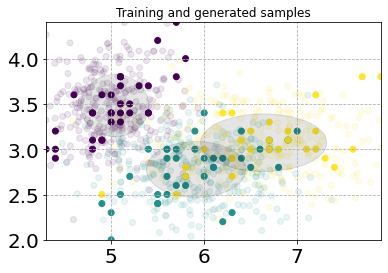

In [ ]:
n_sampled_points = 300
sampled_data = []
sampled_labels = []

plt.figure()
for class_id in range(len(class_names)):

  # plot ellipse of gaussian distribution
  plot_ellipse(plt.gca(), gen_model.theta_[class_id], np.identity(2)*gen_model.sigma_[class_id])

  x_sampled = np.random.multivariate_normal(gen_model.theta_[class_id], np.identity(2)*gen_model.sigma_[class_id], n_sampled_points)
  y_sampled = np.repeat(class_id, repeats=n_sampled_points)
  sampled_data.append(x_sampled)
  sampled_labels.append(y_sampled)

sampled_data = np.concatenate(sampled_data,axis=0)
sampled_labels = np.concatenate(sampled_labels,axis=0)

# plot generated data
plt.scatter(sampled_data[:,0], sampled_data[:,1], c=sampled_labels, alpha=0.1)

# plot training data
plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1], c=y_train)

plt.xlim(np.min(X_train_reduced[:,0]), np.max(X_train_reduced[:,0]))
plt.ylim(np.min(X_train_reduced[:,1]), np.max(X_train_reduced[:,1]))
plt.grid(linestyle="--")
plt.title("Training and generated samples")

Evaluate generative model in classification task

In [ ]:
y_pred = gen_model.predict(X_test_reduced)
acc = accuracy_score(y_pred, y_test)    
print("Accuracy %.3f" %acc)

Accuracy 0.680


## Test generative model resistance to label noise

Noisy labels

Text(0.5, 1.0, 'Noisy training samples')

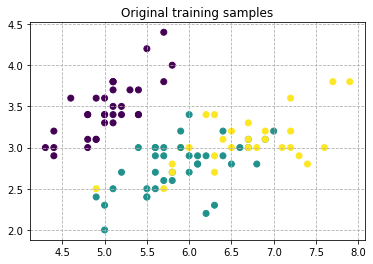

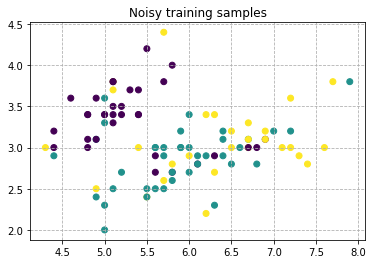

In [ ]:
# randomly permute a percentage of training labels
percentage = 0.4

y_train_noisy = np.copy(y_train)

ix_size = int(percentage * len(y_train_noisy))
ix = np.random.choice(len(y_train_noisy), size=ix_size, replace=False)
b = y_train[ix]
np.random.shuffle(b)
y_train_noisy[ix] = b

# plot original training data
plt.figure()
plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1], c=y_train)
plt.grid(linestyle="--")
plt.title("Original training samples")

# plot noisy training data

plt.figure()
plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1], c=y_train_noisy)
plt.grid(linestyle="--")
plt.title("Noisy training samples")

Fit model to noisy labels

In [ ]:
gen_model = GaussianNB()
gen_model.fit(X_train_reduced, y_train_noisy)
print("Means:", gen_model.theta_)
print("Means shape: ", gen_model.theta_.shape)
print("\n")
print("Standard deviations:", gen_model.sigma_)
print("Standard deviations shape: ", gen_model.sigma_.shape)

Means: [[5.35151515 3.33939394]
 [5.87948718 2.87692308]
 [6.31785714 3.1       ]]
Means shape:  (3, 2)


Standard deviations: [[0.39583104 0.13450872]
 [0.50368179 0.13203156]
 [0.74146684 0.21142857]]
Standard deviations shape:  (3, 2)


Visualize generated samples from noisy estimates

Text(0.5, 1.0, 'Original training and noisy generated samples')

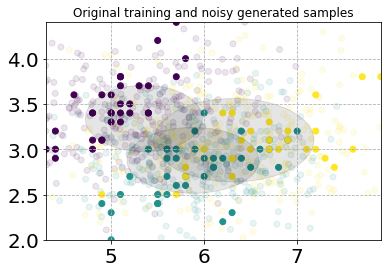

In [ ]:
n_sampled_points = 300
sampled_data = []
sampled_labels = []

plt.figure()
for class_id in range(len(class_names)):

  # plot ellipse of gaussian distribution
  plot_ellipse(plt.gca(), gen_model.theta_[class_id], np.identity(2)*gen_model.sigma_[class_id])

  x_sampled = np.random.multivariate_normal(gen_model.theta_[class_id], np.identity(2)*gen_model.sigma_[class_id], n_sampled_points)
  y_sampled = np.repeat(class_id, repeats=n_sampled_points)
  sampled_data.append(x_sampled)
  sampled_labels.append(y_sampled)

sampled_data = np.concatenate(sampled_data,axis=0)
sampled_labels = np.concatenate(sampled_labels,axis=0)

# plot generated data
plt.scatter(sampled_data[:,0], sampled_data[:,1], c=sampled_labels, alpha=0.1)

# plot original training data
plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1], c=y_train)

plt.xlim(np.min(X_train_reduced[:,0]), np.max(X_train_reduced[:,0]))
plt.ylim(np.min(X_train_reduced[:,1]), np.max(X_train_reduced[:,1]))
plt.grid(linestyle="--")
plt.title("Original training and noisy generated samples")

Evaluate generative model in classification task with noisy labels

In [ ]:
y_pred = gen_model.predict(X_test_reduced)
acc = accuracy_score(y_pred, y_test)    
print("Accuracy %.3f" %acc)

Accuracy 0.660


# Discriminative model

In [ ]:
discrim_model = LogisticRegression()

## Visualize decision boundaries of discriminant classifier


Reduce feature dimensions to 2. We consider only a 2D input for visualizing the decision boundaries of the classifier using 2D plots.

In [ ]:
# select the first two features
X_train_reduced = X_train[:,0:2]
X_test_reduced = X_test[:,0:2]
print("Input shape reduced train: %s" %str(X_train_reduced.shape))
print("Input shape reduced test: %s" %str(X_test_reduced.shape))

Input shape reduced train: (100, 2)
Input shape reduced test: (50, 2)


Fit classifier on data

In [ ]:
discrim_model.fit(X_train_reduced, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Plot decision boundaries of each class versus other classes

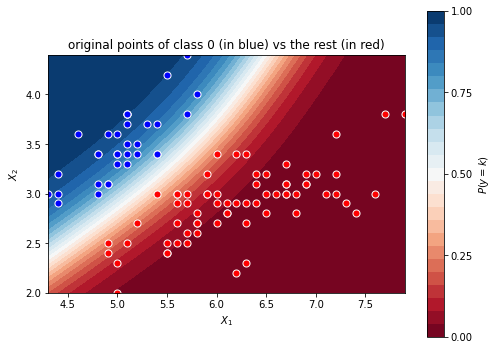

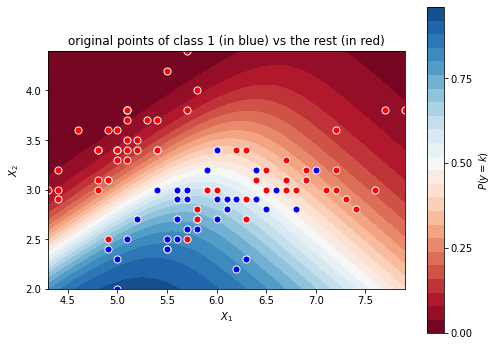

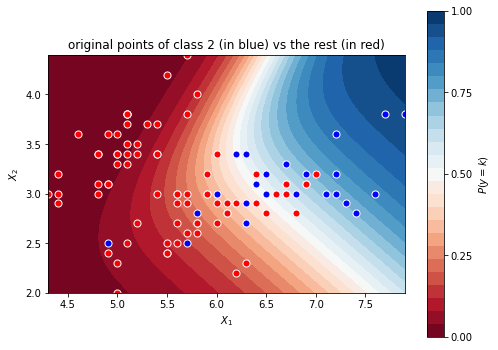

In [ ]:
xx, yy = np.mgrid[np.min(X_train_reduced[:,0]):np.max(X_train_reduced[:,0]):.01, np.min(X_train_reduced[:,1]):np.max(X_train_reduced[:,1]):.01]
grid = np.c_[xx.ravel(), yy.ravel()]

for class_id in range(len(class_names)):
  # compute probability to belong to class class_id
  probs = discrim_model.predict_proba(grid)[:, class_id].reshape(xx.shape)

  f, ax = plt.subplots(figsize=(8, 6))
  contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
  ax_c = f.colorbar(contour)
  ax_c.set_label("$P(y = k)$")
  ax_c.set_ticks([0, .25, .5, .75, 1])

  mask = y_train == class_id

  ax.scatter(X_train_reduced[mask,0], X_train_reduced[mask,1], c="b", s=50, vmin=-.2, vmax=1.2, edgecolor="w", linewidth=1)
  ax.scatter(X_train_reduced[np.logical_not(mask),0], X_train_reduced[np.logical_not(mask),1], c="r", s=50, vmin=-.2, vmax=1.2, edgecolor="w", linewidth=1)

  ax.set(aspect="equal",
        xlim=(np.min(X_train_reduced[:,0]), np.max(X_train_reduced[:,0])), ylim=(np.min(X_train_reduced[:,1]), np.max(X_train_reduced[:,1])),
        xlabel="$X_1$", ylabel="$X_2$")
  ax.set_title("original points of class {} (in blue) vs the rest (in red)".format(class_id))

Evaluate discriminative model on classification task

In [ ]:
y_pred = discrim_model.predict(X_test_reduced)
acc = accuracy_score(y_pred, y_test)    
print("Accuracy %.3f" %acc)

Accuracy 0.680


##Test discriminative model resistance to label noise



Noisy labels

Text(0.5, 1.0, 'Noisy training samples')

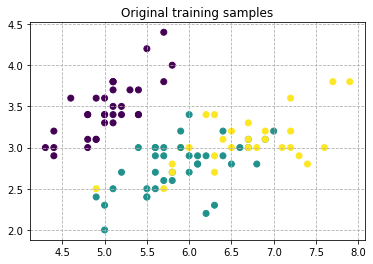

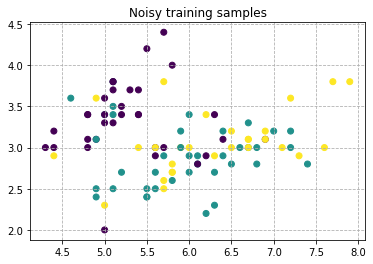

In [ ]:
# randomly permute a percentage of training labels
percentage = 0.4

y_train_noisy = np.copy(y_train)

ix_size = int(percentage * len(y_train_noisy))
ix = np.random.choice(len(y_train_noisy), size=ix_size, replace=False)
b = y_train[ix]
np.random.shuffle(b)
y_train_noisy[ix] = b

# plot original training data
plt.figure()
plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1], c=y_train)
plt.grid(linestyle="--")
plt.title("Original training samples")

# plot noisy training data
plt.figure()
plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1], c=y_train_noisy)
plt.grid(linestyle="--")
plt.title("Noisy training samples")

Fit model to noisy labels

In [ ]:
discrim_model = LogisticRegression()
discrim_model.fit(X_train_reduced, y_train_noisy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Visualize noisy decision boundaries

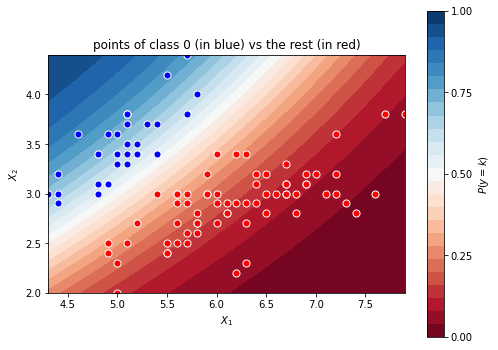

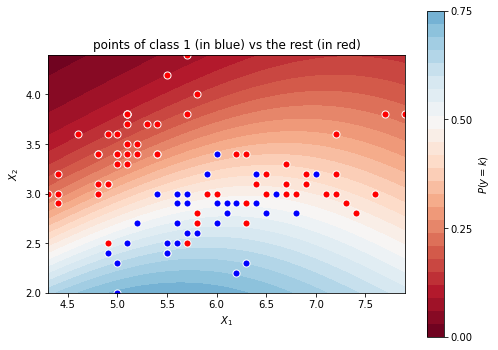

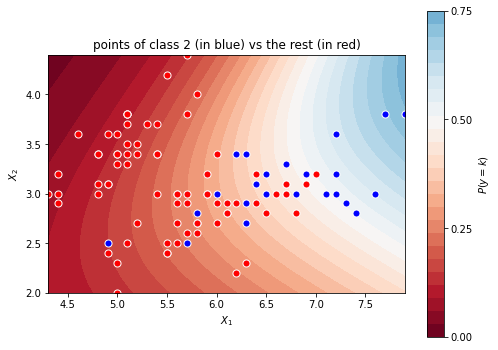

In [ ]:
xx, yy = np.mgrid[np.min(X_train_reduced[:,0]):np.max(X_train_reduced[:,0]):.01, np.min(X_train_reduced[:,1]):np.max(X_train_reduced[:,1]):.01]
grid = np.c_[xx.ravel(), yy.ravel()]

for class_id in range(len(class_names)):
  # compute probability to belong to class class_id
  probs = discrim_model.predict_proba(grid)[:, class_id].reshape(xx.shape)

  f, ax = plt.subplots(figsize=(8, 6))
  contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
  ax_c = f.colorbar(contour)
  ax_c.set_label("$P(y = k)$")
  ax_c.set_ticks([0, .25, .5, .75, 1])

  mask = y_train == class_id

  ax.scatter(X_train_reduced[mask,0], X_train_reduced[mask,1], c="b", s=50, vmin=-.2, vmax=1.2, edgecolor="w", linewidth=1)
  ax.scatter(X_train_reduced[np.logical_not(mask),0], X_train_reduced[np.logical_not(mask),1], c="r", s=50, vmin=-.2, vmax=1.2, edgecolor="w", linewidth=1)

  ax.set(aspect="equal",
        xlim=(np.min(X_train_reduced[:,0]), np.max(X_train_reduced[:,0])), ylim=(np.min(X_train_reduced[:,1]), np.max(X_train_reduced[:,1])),
        xlabel="$X_1$", ylabel="$X_2$")
  ax.set_title("points of class {} (in blue) vs the rest (in red)".format(class_id))

Evaluate discriminative model on classification task

In [ ]:
y_pred = discrim_model.predict(X_test_reduced)
acc = accuracy_score(y_pred, y_test)    
print("Accuracy %.3f" %acc)

Accuracy 0.640


# Home Exercises

Consider all the datasets proposed in this exercise with all input features.

**Question 1**

Compare the performance of both models considering different percentages of noisy labels. Plot performace (e.g., accuracy) over percentage of noisy labels,condsidering percentage values 0.0, 0.25, 0.5, 0.75, 1.

**Question 2** 

Compare the performance of both models considering different percentages of random samples, i.e., samples randomly gathered from random distributions and assigned to each class. 
Plot performace (e.g., accuracy) over percentage of random samples, condsidering percentage values 0.0, 0.25, 0.5, 0.75, 1.
